<a href="https://colab.research.google.com/github/saumya0303/Neural_Network_Creation/blob/master/Tensorflow_basics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#predict y=mx+b line in the given dataset
import tensorflow as tf


In [0]:
n_feature=10 #data has 10 features
n_dense_neurons=3

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import matplotlib.pyplot as plt


In [0]:
x=tf.placeholder(tf.float32,(None,n_feature))

In [0]:
W=tf.Variable(tf.random_normal([n_feature,n_dense_neurons]))

In [0]:
b=tf.Variable(tf.ones([n_dense_neurons]))

In [0]:
xW=tf.matmul(x,W)

In [0]:
z=tf.add(xW,b)

In [0]:
a=tf.nn.sigmoid(z)

In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  layer_out=sess.run(a,feed_dict={x:np.random.random([1,n_feature])})

In [18]:
print(layer_out)

[[0.7878406  0.8485293  0.93488455]]


In [0]:
#we have to adjust w and b for good model
#simple regression example

In [0]:
x_data=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10) #adding some random noise using np.random.uniform

In [20]:
print(x_data)

[-0.88298806 -0.36175072  1.00861933  2.08698784  4.55281652  4.65534477
  5.34961064  7.03683189  7.89435495 10.20580027]


In [0]:
y_label=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [22]:
print(y_label)

[0.52104998 2.27313057 0.9434374  2.92834767 4.39946068 6.83321006
 7.67165967 8.71288545 8.55105182 8.9019107 ]


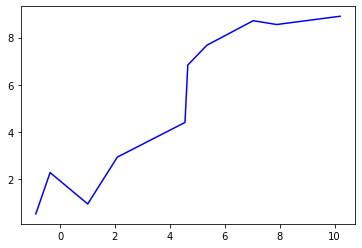

In [26]:
plt.plot(x_data,y_label,'blue')
plt.show()

In [0]:
#initialixe with random variables
m=tf.Variable(0.44)
b=tf.Variable(0.87)

In [0]:
error=0
#zip:-make a tuple of x,y 
for x,y in zip(x_data,y_label):
  y_hat=m*x+b
  error+=(y-y_hat)**2



In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)#pass parameter to minimize

In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  training_step=1000
  for i in range(training_step):
    sess.run(train)#optimizer which minimizes the error
  final_slope,final_intercept=sess.run([m,b])  #fetch back our result

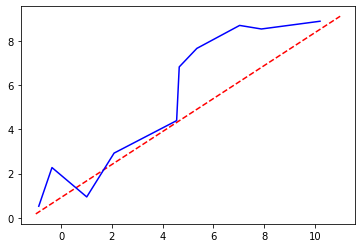

In [41]:
x_test=np.linspace(-1,11,10)
y_pred_plot=final_slope*x_test+final_intercept
plt.plot(x_test,y_pred,'r--')
plt.plot(x_data,y_label,'blue')